Notes:

First we generated Kd's randomly from a distribution that looks like values we would expect from our sorting experiment. We surmised that many mutants would result in weakened/loss of binding, many mutants would have a neutral effect, and a few would improve binding.

We then generated random fluorescence values for clones with these Kds using a randomly selected max average fluorescence value A.

/projects/brpe7306/software/anaconda/envsa/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


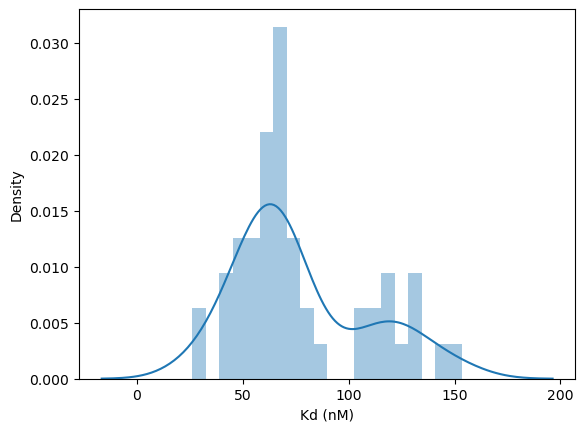

[26.3, 27.6, 45.1, 41.1, 46.7, 62.9, 65.0, 55.1, 70.3, 50.1, 73.8, 72.3, 65.3, 68.7, 55.0, 46.9, 62.2, 48.3, 66.1, 72.1, 62.0, 77.3, 55.9, 66.7, 69.8, 84.6, 41.8, 67.1, 59.2, 60.7, 60.0, 65.5, 64.1, 76.4, 78.6, 66.7, 53.8, 153.5, 102.8, 117.0, 130.3, 126.8, 118.8, 147.1, 131.5, 103.7, 131.7, 114.7, 117.0, 111.3]
[29731.45, 29670.36, 28568.86, 32230.9, 31709.09, 29015.08, 30710.87, 31594.97, 28676.13, 35589.62, 30640.99, 29014.85, 31593.71, 28336.44, 30849.95, 35460.07, 32815.91, 29537.64, 33172.41, 29740.61, 32847.61, 33832.58, 29192.66, 28965.74, 25577.89, 29801.03, 32504.63, 29246.8, 30495.14, 30054.14, 33560.26, 29041.11, 28784.13, 31465.6, 30329.48, 30948.84, 33324.97, 30913.95, 30202.67, 32569.82, 33550.77, 28755.77, 32090.1, 29692.73, 30371.85, 35103.24, 34511.94, 29041.58, 29037.55, 28779.69]


In [40]:
# Run this cell only once to generate random Kd values and max fluorescence
import numpy as np
import random
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, fsolve
from scipy.special import gamma, erf
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def func(x, fmax, kd):
    """Hill Equation"""
    n = 1
    return fmax * x**n / (kd**n + x**n)


# Kd generator - binodal distribution
def generate_kd(num_kds):
    kds = []
    num_kds -= 3
    improvement = [round(i, 1) for i in np.random.normal(0, 10, size=3) + 30]
    sample = random.randint(int(round(0.25 * num_kds)), int(round(0.5 * num_kds)))
    minimal_effect = [
        round(i, 1) for i in np.random.normal(0, 10, size=(num_kds - sample)) + 60
    ]
    loss_of_binding = [round(i, 1) for i in np.random.normal(0, 10, size=sample) + 120]
    kds = improvement + minimal_effect + loss_of_binding
    return kds


num_variants_generated = 50
Kds = generate_kd(num_variants_generated)
# Kds = [40.6, 4.5, 24.9, 63.2, 67.3, 64.4, 50.7, 58.2, 54.9, 62.1, 81.2, 60.3, 63.6, 59.7, 50.7, 125.6, 119.2, 112.3, 106.1, 124.0]
sns.distplot(Kds, bins=20)
plt.xlabel("Kd (nM)")
plt.show()
print(Kds)

# generate A values
mu = 30000
sd = 2500
A = [round(i, 2) for i in np.random.normal(mu, sd, num_variants_generated)]
print(A)

22299.48840369766
11147.977019023756


/tmp/ipykernel_81063/170886011.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_bin_1.append(df[df["Variant number"] == i+1][(df["Fluorescence values"] > cutoff1)].count()[0])
/tmp/ipykernel_81063/170886011.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_bin_2.append(df[df["Variant number"] == i+1][(df["Fluorescence values"] > cutoff2) & (df["Fluorescence values"] < cutoff1)].count()[0])


,Barcode,Kd,Count,Hj,Gj,nk,F_barcode,njk,Concentration,A,Rjk,Bin,ER
0,1,26.3,30,80000.000000,22299.488404,5000,0.02,1250.0,100,29731.45,1250,top25,0.263034
1,2,27.6,37,80000.000000,22299.488404,5000,0.02,1250.0,100,29670.36,1250,top25,0.565597
2,3,45.1,32,80000.000000,22299.488404,5000,0.02,1250.0,100,28568.86,1250,top25,0.356144
3,4,41.1,35,80000.000000,22299.488404,5000,0.02,1250.0,100,32230.90,1250,top25,0.485427
4,5,46.7,32,80000.000000,22299.488404,5000,0.02,1250.0,100,31709.09,1250,top25,0.356144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,46,103.7,25,22299.488404,11147.977019,5000,0.02,1250.0,100,35103.24,1250,next25,0.000000
96,47,131.7,24,22299.488404,11147.977019,5000,0.02,1250.0,100,34511.94,1250,next25,-0.058894
97,48,114.7,23,22299.488404,11147.977019,5000,0.02,1250.0,100,29041.58,1250,next25,-0.120294
98,49,117.0,21,22299.488404,11147.977019,5000,0.02,1250.0,100,29037.55,1250,next25,-0.251539


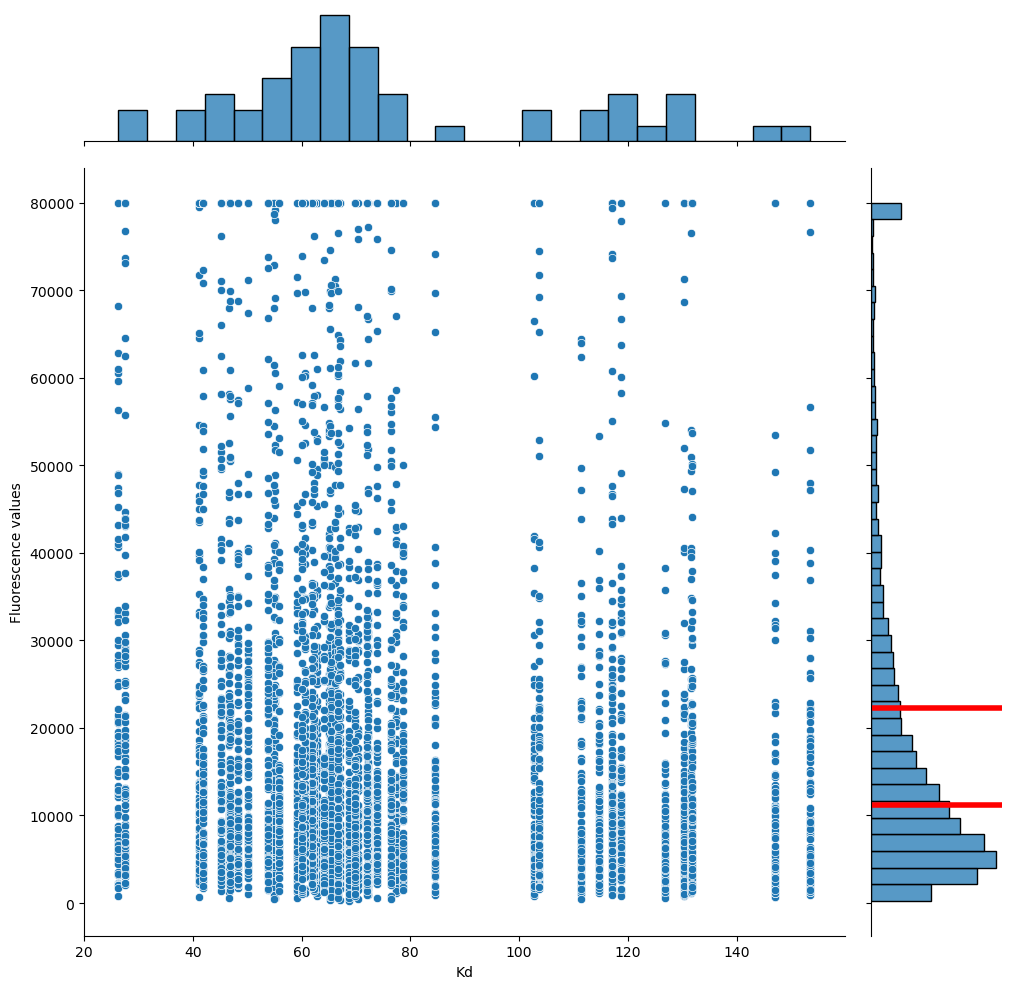

In [44]:
def calc_Fbar(Kds, A, B, Ck):
    return [a * Ck / (kd + Ck) + B for kd, a in zip(Kds, A)]


def generate_fluor_vals(
    Ck,
    num_to_sample=100,
    max_fluor_val=80000,
    B=500,
    sigma=1.0,
    verbose=False,
    make_plots=False,
):
    """Generates num_to_sample random fluorescence values for clone with specified Kds.
    Ck = label concentration
    num_to_sample = library coverage
    max_fluor_val = maximum fluorescence value for clones
    B = variant independent autofluorescence
    sigma = standard deviation of clonal population"""

    Fbars = calc_Fbar(Kds, A, B, Ck)
    mus = [np.log(Fbar) - 0.5 * sigma**2 for Fbar in Fbars]
    fluor_vals = [np.random.lognormal(mu, sigma, num_to_sample) for mu in mus]
    all_fluor = [
        fluor_vals[i][j] for i in range(len(Kds)) for j in range(num_to_sample)
    ]
    all_fluor = [i if i < max_fluor_val else max_fluor_val for i in all_fluor]
    cutoff1 = np.percentile(all_fluor, 75)
    cutoff2 = np.percentile(all_fluor, 50)
    if verbose:
        print(cutoff1)
        print(cutoff2)
    kd = [k for k in Kds for i in range(num_to_sample)]
    variants = [
        i + 1 for i in range(num_variants_generated) for j in range(num_to_sample)
    ]
    df = pd.DataFrame(
        {
            "Variant number": variants,
            "Kd": kd,
            "Fluorescence values": all_fluor,
            "Label": [Ck] * len(kd),
        }
    )
    # df.to_csv("test.csv")
    if make_plots:
        sns.jointplot(x="Kd", y="Fluorescence values", data=df, height=10)
        plt.axhline(y=cutoff1, xmin=0, xmax=140, color="r", linewidth=4, zorder=1)
        plt.axhline(y=cutoff2, xmin=0, xmax=140, color="r", linewidth=4, zorder=1)
        # plt.savefig("cutoffs"+str(Ck)+"nM.png", dpi=300)

    num_sort_bins = 2
    count_bin_1, count_bin_2 = [], []
    h1, g1, h2, g2 = [], [], [], []
    for i in range(num_variants_generated):
        count_bin_1.append(
            df[df["Variant number"] == i + 1][
                (df["Fluorescence values"] > cutoff1)
            ].count()[0]
        )
        count_bin_2.append(
            df[df["Variant number"] == i + 1][
                (df["Fluorescence values"] > cutoff2)
                & (df["Fluorescence values"] < cutoff1)
            ].count()[0]
        )
        h1.append(max_fluor_val)
        g1.append(cutoff1)
        h2.append(cutoff1)
        g2.append(cutoff2)

    df_top25 = pd.DataFrame(
        {
            "Barcode": [i + 1 for i in range(num_variants_generated)],
            "Kd": Kds,
            "Count": count_bin_1,
            "Hj": h1,
            "Gj": g1,
            "nk": [num_to_sample * num_variants_generated] * num_variants_generated,
            "F_barcode": [1 / num_variants_generated] * num_variants_generated,
            "njk": [num_to_sample * num_variants_generated * 0.25]
            * num_variants_generated,
            "Concentration": [Ck] * num_variants_generated,
            "A": A,
            "Rjk": sum(count_bin_1),
            "Bin": "top25",
        }
    )
    df_next25 = pd.DataFrame(
        {
            "Barcode": [i + 1 for i in range(num_variants_generated)],
            "Kd": Kds,
            "Count": count_bin_2,
            "Hj": h2,
            "Gj": g2,
            "nk": [num_to_sample * num_variants_generated] * num_variants_generated,
            "F_barcode": [1 / num_variants_generated] * num_variants_generated,
            "njk": [num_to_sample * num_variants_generated * 0.25]
            * num_variants_generated,
            "Concentration": [Ck] * num_variants_generated,
            "A": A,
            "Rjk": sum(count_bin_2),
            "Bin": "next25",
        }
    )
    df_counts = pd.concat([df_top25, df_next25], ignore_index=True)
    df_counts["ER"] = np.log2(
        (df_counts["Count"] / df_counts["Rjk"]) / (df_counts["F_barcode"])
    )
    # df_counts.to_csv("counts"+str(Ck)+"nM.csv", index=False)
    return df_counts


generate_fluor_vals(100, verbose=True, make_plots=True)

In [42]:
# generate fluorescence values for variants at the following input label concentrations and append to csv file
df_array = []
concentrations = [10, 20, 30, 40, 50, 60, 75, 100, 150, 200]
for conc in concentrations:
    df_array.append(generate_fluor_vals(conc, num_to_sample=1000))
output_df = pd.concat(df_array, ignore_index=True)
# output_df = output_df.pivot_table(values='ER', index='Variant', columns=['Label', 'Gj'])
output_df.to_csv("test.csv", index=False)
# df.to_csv("4A8_allbins_enrich.csv", index=True)

/tmp/ipykernel_81063/170886011.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_bin_1.append(df[df["Variant number"] == i+1][(df["Fluorescence values"] > cutoff1)].count()[0])
/tmp/ipykernel_81063/170886011.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_bin_2.append(df[df["Variant number"] == i+1][(df["Fluorescence values"] > cutoff2) & (df["Fluorescence values"] < cutoff1)].count()[0])
/tmp/ipykernel_81063/170886011.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_bin_1.append(df[df["Variant number"] == i+1][(df["Fluorescence values"] > cutoff1)].count()[0])
/tmp/ipykernel_81063/170886011.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_bin_2.append(df[df["Variant number"] == i+1][(df["Fluorescence values"] > cutoff2) & (df["Fluorescence values"] < cutoff1)].count()[0])
/tmp/ipykernel_81063/170886011.py:34: UserWarnin